#  Clasificacion de imagenes con MNIST con una red neuronal convulsionada (CNN)
---
**Autor:** Escalante Guadarrama Jorge Eduardo

**Importar librerias**

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

**Cargar el dataset MNIST**

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Normalizar las imágenes y ajustar la forma para la CNN**

In [ ]:
# Normalize images and reshape for the CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

**Definir el modelo CNN**

In [ ]:
# Define the Convolutional Neural Network model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output classes for digits 0-9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilar el modelo**

In [ ]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrenar el modelo**

In [ ]:
# Train the model on the training data
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9096 - loss: 0.2912 - val_accuracy: 0.9833 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9869 - loss: 0.0449 - val_accuracy: 0.9858 - val_loss: 0.0387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9923 - val_loss: 0.0253
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9930 - loss: 0.0211 - val_accuracy: 0.9909 - val_loss: 0.0267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9960 - loss: 0.0142 - val_accuracy: 0.9919 - val_loss: 0.0285


**Verificar la precisión del modelo**

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9902 - loss: 0.0349
Test accuracy: 0.9919000267982483


**Graficar pérdidas y precisión**

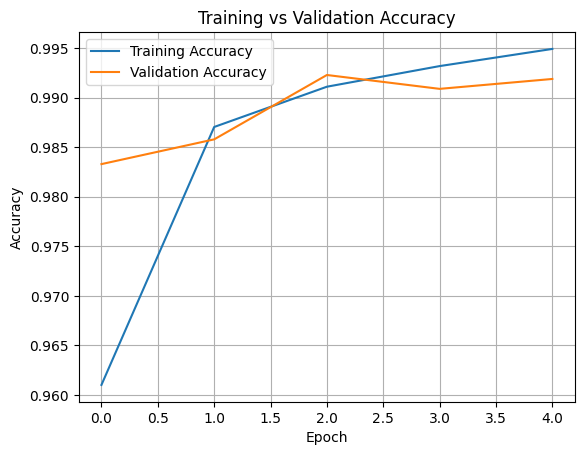

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()